In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Data & Preliminary Look

In [2]:
# load dataset 
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

terdapat 62988 baris dan 23 kolom 

In [4]:
# analisa deskriptif utk kolom numeric
nums = ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1','SUM_YR_2',
        'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
        'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
df[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


observasi :
- 'AGE' kurang masuk akal karena rata-rata umur manusia 60-70an akan tetapi di kolom 'AGE' ada yg hingga berumur 110 tahun.
- rata-rata kolom yg berdistribusi skew positif karena mean lebih besar dibanding median

In [5]:
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
        'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


# Data Cleaning

In [6]:
# cek missing value
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

terdapat missing value di beberapa kolom tapi karena kolom

tersebut nantinya tidak dipakai maka lebih baik di drop

In [7]:
# drop kolom yang tidak relevan
df = df.drop(['GENDER', 'MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE',
              'WORK_COUNTRY', 'AGE', 'SUM_YR_1', 'SUM_YR_2'], axis=1)

In [8]:
# Recheck 
df.isnull().sum()

FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [9]:
# Check duplicated data
df.duplicated().sum()

89

In [10]:
# lihat data yang duplikat
duplicate = df[df.duplicated(keep=False)]

print('duplicate rows:')

duplicate

duplicate rows:


,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
7741,10/31/2010,10/10/2011,4,3/31/2014,4,25494,30398,11/23/2013,130,130.0,243,0,0.86,25494,0
7742,10/31/2010,10/10/2011,4,3/31/2014,4,25494,30398,11/23/2013,130,130.0,243,0,0.86,25494,0
8106,10/30/2011,2/15/2012,4,3/31/2014,3,13956,36696,11/23/2013,130,219.5,266,0,0.69,13956,0
8107,10/30/2011,2/15/2012,4,3/31/2014,3,13956,36696,11/23/2013,130,219.5,266,0,0.69,13956,0
13292,10/26/2012,7/28/2013,4,3/31/2014,2,16284,24464,8/15/2013,230,18.0,18,0,0.72,16284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62317,9/19/2012,9/19/2012,4,3/31/2014,2,698,1902,9/19/2012,560,0.0,0,0,0.40,698,0
62551,6/1/2012,6/9/2012,4,3/31/2014,2,0,2710,6/12/2012,659,3.0,3,0,0.25,0,0
62552,6/1/2012,6/9/2012,4,3/31/2014,2,0,2710,6/12/2012,659,3.0,3,0,0.25,0,0
62734,5/19/2012,5/3/2013,4,3/31/2014,2,400,1158,5/6/2013,331,3.0,3,0,0.50,400,0


In [11]:
# drop duplicated data
df = df.drop_duplicates()
df.duplicated().sum()

0

# Preprocessing

# Features Selection

karena terdapat banyak kolom tetapi tidak menyediakan informasi yang dibutuhkan. maka dari itu akan dipilih fitur yang sesuai menggunakan metode LRFMC yaitu length, recency, frequency, monetary, dan cost.

referensi:
https://books.google.co.id/books?id=CcH4DwAAQBAJ&pg=PA95&lpg=PA95&dq=chinese+member+airline+data+customer+bp_sum&source=bl&ots=MuNwvzNnN-&sig=ACfU3U0hPyubVpBG7RGuxmQgm9Zn7m2g6g&hl=en&sa=X&ved=2ahUKEwjZsKzHy7LsAhWZaCsKHW9XDW8Q6AEwCHoECAoQAg#v=onepage&q=chinese%20member%20airline%20data%20customer%20bp_sum&f=false

In [12]:
lrfmc = df[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END',
            'FLIGHT_COUNT','SEG_KM_SUM', 'avg_discount']]
lrfmc.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,3/31/2014,11/2/2006,1,210,580717,0.961639
1,3/31/2014,2/19/2007,7,140,293678,1.252314
2,3/31/2014,2/1/2007,11,135,283712,1.254676
3,3/31/2014,8/22/2008,97,23,281336,1.090870
4,3/31/2014,4/10/2009,5,152,309928,0.970658


In [13]:
lrfmc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62899 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOAD_TIME     62899 non-null  object 
 1   FFP_DATE      62899 non-null  object 
 2   LAST_TO_END   62899 non-null  int64  
 3   FLIGHT_COUNT  62899 non-null  int64  
 4   SEG_KM_SUM    62899 non-null  int64  
 5   avg_discount  62899 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [14]:
lrfmc['LOAD_TIME'] = pd.to_datetime(lrfmc['LOAD_TIME'])
lrfmc['FFP_DATE'] = pd.to_datetime(lrfmc['FFP_DATE'])
lrfmc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62899 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   LOAD_TIME     62899 non-null  datetime64[ns]
 1   FFP_DATE      62899 non-null  datetime64[ns]
 2   LAST_TO_END   62899 non-null  int64         
 3   FLIGHT_COUNT  62899 non-null  int64         
 4   SEG_KM_SUM    62899 non-null  int64         
 5   avg_discount  62899 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.4 MB


In [15]:
lrfmc['member_length'] = (lrfmc['LOAD_TIME'] - lrfmc['FFP_DATE'])/np.timedelta64(1,'M')
lrfmc.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,member_length
0,2014-03-31,2006-11-02,1,210,580717,0.961639,88.905316
1,2014-03-31,2007-02-19,7,140,293678,1.252314,85.324134
2,2014-03-31,2007-02-01,11,135,283712,1.254676,85.915522
3,2014-03-31,2008-08-22,97,23,281336,1.090870,67.253948
4,2014-03-31,2009-04-10,5,152,309928,0.970658,59.664469


In [16]:
new_df = lrfmc[['member_length', 'LAST_TO_END', 'FLIGHT_COUNT',
                'SEG_KM_SUM', 'avg_discount']]
                
new_df.head()

,member_length,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,88.905316,1,210,580717,0.961639
1,85.324134,7,140,293678,1.252314
2,85.915522,11,135,283712,1.254676
3,67.253948,97,23,281336,1.090870
4,59.664469,5,152,309928,0.970658


# Check Outlier

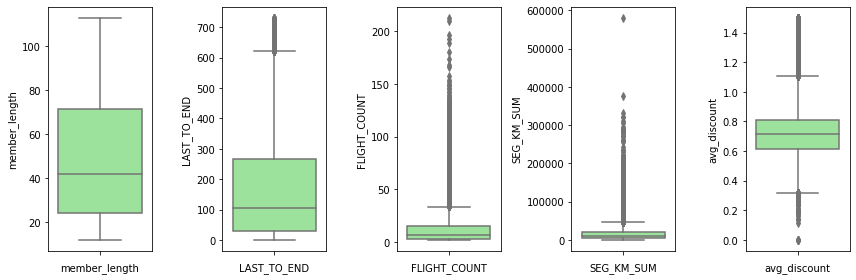

In [17]:
fitur = ['member_length', 'LAST_TO_END', 'FLIGHT_COUNT',
         'SEG_KM_SUM', 'avg_discount']

plt.figure(figsize=(12,4))

for i in range(0, len(fitur)):
  plt.subplot(1, 5, i+1)
  sns.boxplot(y=new_df[fitur[i]], color='lightgreen')
  plt.xlabel(fitur[i])
  plt.tight_layout()

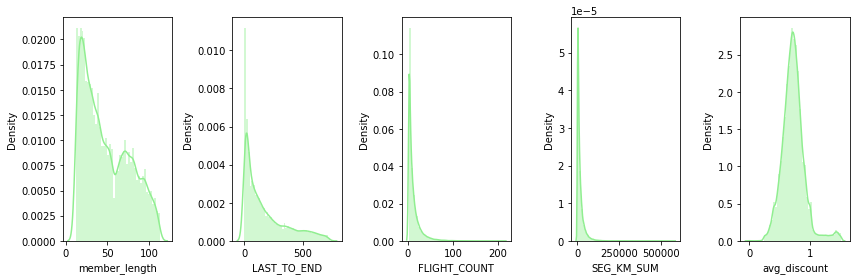

In [18]:
plt.figure(figsize=(12,4))

for i in range(0, len(fitur)):
  plt.subplot(1, 5, i+1)
  sns.distplot(x=new_df[fitur[i]], color='lightgreen')
  plt.xlabel(fitur[i])
  plt.tight_layout()

In [19]:
# hitung jumlah baris sebelum deteksi outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(new_df[fitur])}')

filtered_entries = np.array([True] * len(new_df[fitur]))
for col in fitur :
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((new_df[col] >= low_limit) & (new_df[col] <= high_limit)) & filtered_entries
    
new_df_clean = new_df[filtered_entries].reset_index()

# hitung jumlah baris setelah outlier
print(f'Jumlah baris setelah memfilter outlier: {len(new_df_clean)}')

Jumlah baris sebelum memfilter outlier: 62899
Jumlah baris setelah memfilter outlier: 52996


terdapat outlier berkisar 15% dari seluruh data. disini akan menggunakan data yang bersih dari outlier dalam memprediksi segmentasi.

In [20]:
# optional utk melihat outlier
new_df_outlier = new_df[~filtered_entries]
new_df_outlier

,member_length,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,88.905316,1,210,580717,0.961639
1,85.324134,7,140,293678,1.252314
2,85.915522,11,135,283712,1.254676
3,67.253948,97,23,281336,1.090870
4,59.664469,5,152,309928,0.970658
...,...,...,...,...,...
62983,34.366209,297,2,1134,0.000000
62984,48.756648,89,4,8016,0.000000
62985,96.034826,29,2,2594,0.000000
62986,13.733342,400,2,3934,0.000000


# Standardisasi

In [21]:
new_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52996 entries, 0 to 52995
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          52996 non-null  int64  
 1   member_length  52996 non-null  float64
 2   LAST_TO_END    52996 non-null  int64  
 3   FLIGHT_COUNT   52996 non-null  int64  
 4   SEG_KM_SUM     52996 non-null  int64  
 5   avg_discount   52996 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 2.4 MB


In [22]:
# drop kolom index
new_df_clean = new_df_clean.drop(['index'], axis=1)
# optional rename columns
new_df_clean.rename(columns={'member_length':'L', 'LAST_TO_END':'R',
                                            'FLIGHT_COUNT':'F', 'SEG_KM_SUM':'M',
                                            'avg_discount':'C'}, inplace=True)


In [23]:
new_df_clean.head()

,L,R,F,M,C
0,88.741042,16,29,43790,1.099567
1,71.360808,108,8,45604,1.042694
2,44.222674,7,29,44033,1.059304
3,76.946139,436,6,45460,1.019714
4,52.633524,155,18,44574,1.039563


In [24]:
# standardisasi
fitur = ['L', 'R', 'F', 'M', 'C']
X = new_df_clean[fitur].values
X_std = StandardScaler().fit_transform(X)
df_lrfmc = pd.DataFrame(data=X_std, columns=fitur)
df_lrfmc

,L,R,F,M,C
0,1.502158,-0.951918,2.889331,3.175436,2.751478
1,0.868791,-0.394530,-0.104953,3.358656,2.360433
2,-0.120172,-1.006445,2.889331,3.199980,2.474643
3,1.072331,1.592679,-0.390123,3.344112,2.202432
4,0.186335,-0.109778,1.320896,3.254623,2.338911
...,...,...,...,...,...
52991,0.593414,1.483625,-0.960463,-1.210344,0.347958
52992,-0.981025,1.447274,-0.960463,-1.210344,0.347958
52993,-1.292321,1.114053,-0.960463,-1.170751,-2.402326
52994,2.158274,-0.509643,-0.960463,-1.210344,0.072929


# Modelling

## Elbow Method

In [25]:
list_inertia = []
for i in range(1,11):

  model = KMeans(n_clusters=i, random_state=42)
  model.fit(df_lrfmc.values)

  nilai_inertia = model.inertia_
  print('iterasi ke-',i, 'degan nilai inertia:', nilai_inertia)
  list_inertia.append(nilai_inertia)

iterasi ke- 1 degan nilai inertia: 264979.9999999985
iterasi ke- 2 degan nilai inertia: 185161.4021594333
iterasi ke- 3 degan nilai inertia: 152408.19436228726
iterasi ke- 4 degan nilai inertia: 128246.52793398555
iterasi ke- 5 degan nilai inertia: 112415.24811589794
iterasi ke- 6 degan nilai inertia: 102381.72028390763
iterasi ke- 7 degan nilai inertia: 94450.53645117882
iterasi ke- 8 degan nilai inertia: 87813.21374718654
iterasi ke- 9 degan nilai inertia: 81956.86354496717
iterasi ke- 10 degan nilai inertia: 77420.9114233169


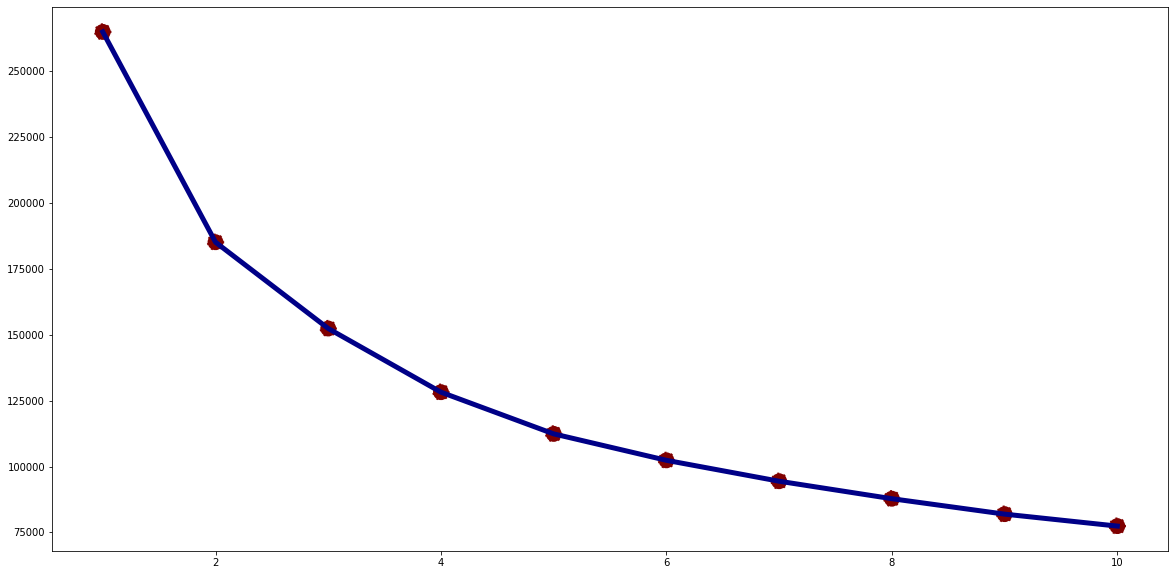

In [26]:
plt.figure(figsize=(20,10))

sns.lineplot(x=range(1,11), y=list_inertia, color='#000087', linewidth=5)
sns.scatterplot(x=range(1,11), y=list_inertia, s=300,
                color='#800000', linestyle='--')

# Clustering

berdasarkan elbow method maka 4 nilai yg baik.
karena:
- setelah titik 4 mulai melandai.
- dari hasil list nilai inertia 4 dan berikutnya mulai melandai penurunannya. 

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(df_lrfmc)

In [28]:
new_df_clean['cluster'] = kmeans.labels_

In [29]:
new_df_clean.head()

,L,R,F,M,C,cluster
0,88.741042,16,29,43790,1.099567,3
1,71.360808,108,8,45604,1.042694,3
2,44.222674,7,29,44033,1.059304,3
3,76.946139,436,6,45460,1.019714,3
4,52.633524,155,18,44574,1.039563,3


In [30]:
display(new_df_clean.groupby('cluster').agg('median'))

,L,R,F,M,C
cluster,,,,,
0,32.394916,433.0,3.0,4351.0,0.725000
1,26.382472,95.0,6.0,8254.0,0.678548
2,79.245980,109.0,6.0,8477.0,0.708490
3,48.789503,35.0,19.0,26868.0,0.717041


kesimpulan :
1. kelompok 1 yang merupakan durasi member nya sedang berkisar di 32 bulan, melakukan flight sedikit, sehingga jumlah rute penerbangan juga paling kecil, mempunyai rentang yang paling jauh dari penerbangan terakhir nya.
2. kelompok 2 yang merupakan durasi member nya paling kecil berkisar di 26 bulan, melakukan flight tidak sedikit tidak sering, sehingga jumlah rute penerbangan juga cukup besar, mempunyai rentang yang cukup kecil dari penerbangan terakhir nya.
3. kelompok 3 yang merupakan paling loyal durasi member nya paling besar berkisar di 79 bulan, melakukan flight tidak sedikit tidak sering, sehingga jumlah rute penerbangan cukup besar, tetapi mempunyai rentang cukup besar dari penerbangan terakhir nya.
4. kelompok 4 yang merupakan paling profitable durasi member nya tidak besar dan tidak kecil berkisar di 48 bulan, melakukan flight paling sering, sehingga jumlah rute penerbangan paling besar, mempunyai rentang yang paling pendek dari penerbangan terakhir nya.

berdasarkan kelompok yang paling menguntungkan adalah sbg berikut :
- kelompok 4
- kelompok 2
- kelompok 3
- kelompok 1

In [31]:
df_std = pd.DataFrame(data=df_lrfmc, columns=list(df_lrfmc))
df_std

,L,R,F,M,C
0,1.502158,-0.951918,2.889331,3.175436,2.751478
1,0.868791,-0.394530,-0.104953,3.358656,2.360433
2,-0.120172,-1.006445,2.889331,3.199980,2.474643
3,1.072331,1.592679,-0.390123,3.344112,2.202432
4,0.186335,-0.109778,1.320896,3.254623,2.338911
...,...,...,...,...,...
52991,0.593414,1.483625,-0.960463,-1.210344,0.347958
52992,-0.981025,1.447274,-0.960463,-1.210344,0.347958
52993,-1.292321,1.114053,-0.960463,-1.170751,-2.402326
52994,2.158274,-0.509643,-0.960463,-1.210344,0.072929


In [32]:
df_std['cluster'] = kmeans.labels_
df_std.head()

,L,R,F,M,C,cluster
0,1.502158,-0.951918,2.889331,3.175436,2.751478,3
1,0.868791,-0.394530,-0.104953,3.358656,2.360433,3
2,-0.120172,-1.006445,2.889331,3.199980,2.474643,3
3,1.072331,1.592679,-0.390123,3.344112,2.202432,3
4,0.186335,-0.109778,1.320896,3.254623,2.338911,3


In [33]:
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = new_df_clean['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,4.682659,2.252534,3
1,2.897917,1.893488,3
2,4.385639,1.073761,3
3,1.993646,2.322213,3
4,3.319511,1.442730,3


In [34]:
data_pca['cluster'].value_counts()

1    18926
2    12167
0    11074
3    10829
Name: cluster, dtype: int64

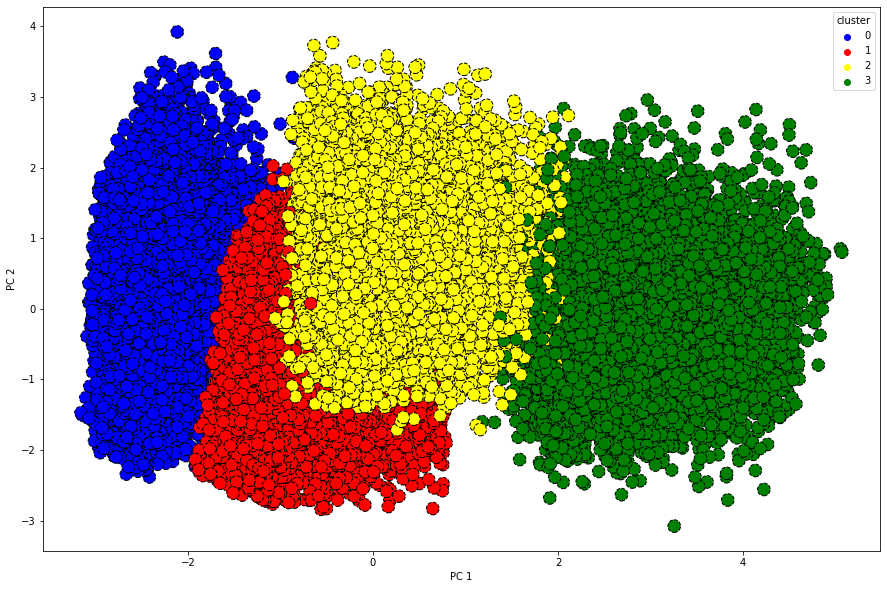

In [35]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','yellow', 'green'],
    s=160,
    ax=ax
)

In [36]:
cluster_distribution = new_df_clean['cluster'].value_counts().reset_index()
cluster_distribution.columns = ['cluster','number of users']
cluster_distribution.sort_values('cluster', ascending=True)

,cluster,number of users
2,0,11074
0,1,18926
1,2,12167
3,3,10829


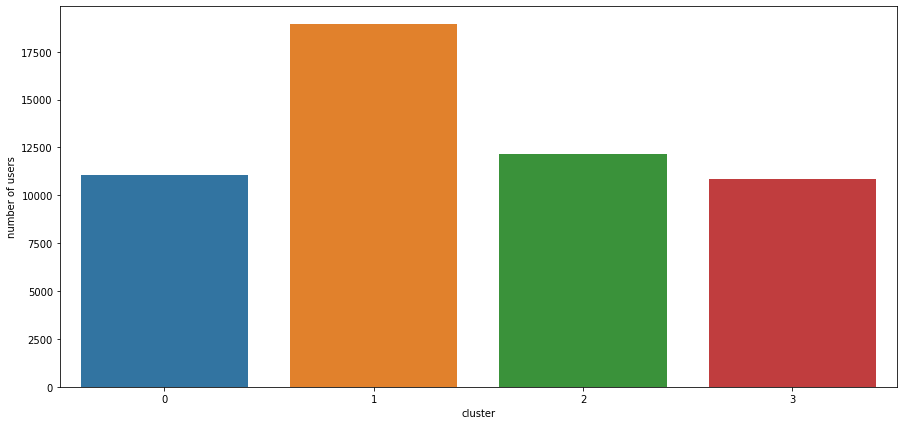

In [37]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'cluster',y='number of users',data=cluster_distribution,ax=ax)

x = np.arange(len(cluster_distribution['cluster']))
y = cluster_distribution['number of users']